In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
!pip install scikit-opt
from sko.PSO import PSO
import numpy as np
from scipy.fft import dct, idct

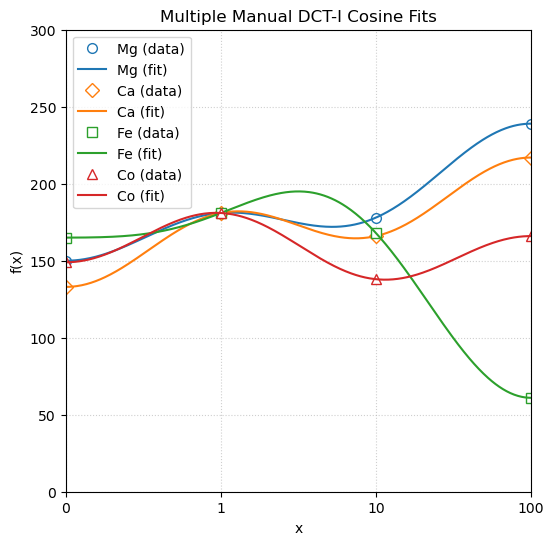

In [7]:
# 封装为一个函数，输入一组 x, f 数据，输出拟合曲线
def DCT(x, f, label=None, color=None, N_highres=500, marker='o'): # Added 'marker' parameter
    N = len(x)
    x_min = np.min(x)
    x_max = np.max(x)
    x_normalized = (x - x_min) / (x_max - x_min)

    # DCT-I 变换
    a = dct(f, type=1)

    # 高分辨率 X（原始范围）
    x_highres = np.linspace(x_min, x_max, N_highres)
    xh_norm = (x_highres - x_min) / (x_max - x_min)  # 高分辨率 x 也归一化

    # 手动 DCT-I 重建高分辨率曲线
    f_highres = np.zeros_like(x_highres)
    for n in range(N):
        coef = a[n]
        if n == 0 or n == N - 1:
            coef /= 2
        f_highres += coef * np.cos(n * np.pi * xh_norm)
    f_highres /= (N - 1)

    # 绘制拟合曲线和原始点
    plt.plot(x, f, marker, markersize=7, markerfacecolor='white', # Used 'marker' here
             label=f'{label} (data)', color=color, markeredgecolor=color)
    plt.plot(x_highres, f_highres, '-', linewidth=1.5,
             label=f'{label} (fit)', color=color)
# 三组示例数据
x = np.array([0, 1, 2, 3])  # 所有组都共用相同 x 坐标（可改）
y_sets = [
    np.array([150, 181, 178, 239]),
    np.array([133, 181, 166, 217]),
    np.array([165, 181, 168, 61]),
    np.array([149, 181, 138, 166])
]
labels = ['Mg', 'Ca', 'Fe', 'Co']
colors = ['#1f77b4',  # 蓝（蓝钢色）
          '#ff7f0e',  # 橙（柔和橙）
          '#2ca02c',  # 绿（温和绿）
          '#d62728']  # 红（砖红）
markers = ['o', 'D', 's', '^'] # Circle, Diamond, Square, Triangle

# 绘图
plt.figure(figsize=(6, 6))
for i in range(4):
    # THIS IS THE LINE TO MODIFY:
    DCT(x, y_sets[i], label=labels[i], color=colors[i], marker=markers[i]) # Added 'marker=markers[i]'
    
plt.title('Multiple Manual DCT-I Cosine Fits')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.ylim(0, 300)
plt.xlim(0, 3)
# Define the locations where you want the ticks to appear (these should match your original x array values)
tick_locations = np.array([0, 1, 2, 3])

# Define the custom labels you want to display at those locations
custom_labels = ['0', '1', '10', '100']

# Set the x-axis ticks and their labels
plt.xticks(tick_locations, custom_labels)
plt.show()

# PSO

In [4]:

# 设置迭代次数
max_iter = 50
N = 4
a = dct(y_sets[3], type=1)  # 初始化 DCT 系数数组
# 定义PSO的目标函数
def fourier_objective_function(x):
    """
    PSO目标函数，基于傅里叶余弦级数。
    输入 x 是标量（因为 n_dim=1），返回 -f(x) 以寻找最大值。
    """
    # 确保 x 是标量或单元素数组
    xh_norm = (x - 0) / (3 - 0)  # 归一化到 [0, 1] 范围
    f_highres = np.zeros_like(xh_norm)
    for n in range(N):
        coef = a[n]
        if n == 0 or n == N - 1:
            coef /= 2
        f_highres += coef * np.cos(n * np.pi * xh_norm)
    f_highres /= (N - 1)
    return -f_highres

# 初始化 PSO
pso = PSO(func=fourier_objective_function, n_dim=1, pop=10, max_iter=max_iter,
          lb=[0], ub=[3],w=0.6, c1=1, c2=1)

pso.record_mode = True
pso.run()


(array([0.96922404]), array([-181.08366391]))